### 砂防ゼミ　シミュレーション１：

## 拡散偏微分方程式

##### C. Gomez

Parabolic Partial Differential equations

Parabolic partial differential equations (PPDE) are the most important equations of sciences and engineering and most of the problems and simulations you will meet can be simplified and reduced to such equations. They are commonly used for fluid flow boundary condition modelling, they are the equations of heat transfer, but also any transfer of pollutant or small material diffusing from one location to another. This equation is often referred to as the diffusion equation (拡散方程式).

A typical formulation of the model in 1D would be using the following partial differential equation(偏微分方程式):

$$ 
\frac{\partial u}{\partial t} = \alpha \frac{\partial ^2 u}{\partial x^2}
$$

This equation is also offened used to model the sediment transfer on slopes.

#### (a) Discretizing the equation in time and space

To solve such equation, we need to be able to transform the continuous form into a discrete form, and we would need two of such a thing, one for time and one for space.

##### Time

First we are going to look at the term on the left, i.e. the differentiation of the term over time using a FORWARD DIFFERENCE approximation over delta t.:

$$
\frac{\partial u}{\partial t} = \frac {u^{n+1} _i - u^n _i}{\Delta t} + O(\Delta t)
$$

(Such an approximation is called a forward difference approximation of order Delta t)

##### Space

Using the second-order central differencing of order (Delta x)^2 for the diffusion term:

$$
\alpha \frac{\partial^2 u}{\partial x^2} = \alpha \frac{u^2 _{i+1}- 2u^n _i + u^2 _i-1}{(\Delta x)^2}
$$


##### So that the discretized equations in time and space is:

$$
\frac{u^{n+1} _i - u^n _i}{\Delta t} = \alpha \frac{u^n _{i+1} - 2u^n _i + u^n _{i-1}}{(\Delta x)^2}
$$

Now that we have this equation we will need to predict the next time step, starting from time step n, we want to know what is happening at time step n+1. To do that, we need to separate the quantity which is being diffused. To do that, the equation will then look like this:

$$
u^{n+1} _i =u^n _i + \frac{\alpha (\Delta t)}{(\Delta x)^2} (u^n _{i+1} - 2u^n _i + u^n _{i-1})
$$



To solve the discretized equations, there are different methods that exists. They are divided into two large groups, the explicit methods and the implicit methods. In our cases, we will mostly rely on explicit methods. Implicit methods are often more stable, but they require more sophisticated mathematical methods.

#### (b) Explicit Methods

There are several methods, and you will see that some methods can be used with certain equations, while others will accept stable conditions providing that some conditions are met. The most common method used to solve the parabolic equations is the 

###### FORWARD TIME - CENTRAL SPACE METHOD: FTCS

The diffusion equation in 1D then become:

$$
u^{n+1} _i = u^n _i + \frac{\alpha (\Delta t)}{(\Delta x)^2} (u^n _{i+1} - 2u^n _i + u^n _{i-1})
$$



##### The Dufort-Frankel method

The Dufort-Frankel method is differentiating over 2t and is second order in space (delta x)^2 and to create a stable solution, the diffusion term at location i and time n is replaced by averaging the values at i+1 and i-1.

The diffusion equation:
$$ 
\frac{\partial u}{\partial t} = \alpha \frac{\partial ^2 u}{\partial x^2}
$$

is then discretized this way:

$$
\frac{u^{n+1} _i - u^{n-1} _i}{2 \Delta t} = \alpha \frac{u^n _{i+1} - 2 \frac{u^{n+1} + u ^n-1 _i}{2} + u^n _{i-1}}{(\Delta x)^2}
$$

so that the values of u(n+1, i) is:

$$
u^{n+1} _i = u^{n-1} _i + \frac{2 \alpha (\Delta t)}{(\Delta x)^2}[u^n _{i+1} - u^{n+1} _i - u^{n-1} _i + u^n _{i-1}]
$$



###### If you look at this equation, you can see that we have a n+1 on the right hand side, so that the unknown is on both sides, for this reason, we need a bit of rearranging.

so that we get the value at the next time step (n+1) for each cell i to be:

-
-
-
-
-
-
-
-
(try it first)
-
-
-
-
-
-
-
-
$$
[1+ \frac{2 \alpha (\Delta t)}{(\Delta x)^2}]u^{n+1} _i = [1 - 2 \frac{\alpha (\Delta t)}{(\Delta x)^2} u^{n-1} _i + \frac{2 \alpha (\Delta t)}{(\Delta x)^2} [u^n _{i+1} + u^n _{i-1}]
$$

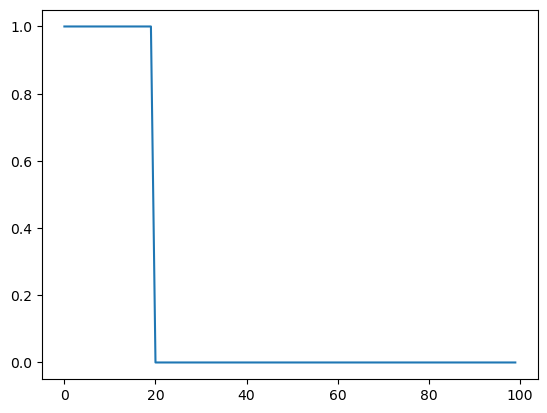

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# First we define the variables that will be used for computation and "set them up". 
# In other words, we make some space where to store the data.

num_points = 100  # Number of points in the domain
num_steps = 1000  # Number of time steps
delta_x = 1.0  # Spacing between points -> for each computation point, we can imagine that it is 1 m.
delta_t = 0.01  # Time step size -> This will allow us to update our time marching machine underneath.
alpha = 38     # This is the diffusion coefficient (fixed in the present case) 

sediment = np.zeros((num_steps, num_points)) # now imagine that we are diffusing sediments, so that to do so, we will need to have
                                             # a grid that corresponds to the space steps, and the time step (Chris to draw on the board)

sediment[0, :] = 0.0  # Imagine that first we have at all points at the start 0.0 at the beginning. This is redundant as we have set the 
                      # sediment array with a set of 0s above.
    
sediment[0, 0:20] = 1.0  # Initial sediment source on the left. The source could be anywhere, it does not matter.

plt.plot(sediment[0,:])  # this plots the initial condition at time 0 (grid 0 in time and all the points in space.)

#### Next we need to run the compuation. One "not so clever way" of doing it is to do a double loop in time and in space, so that for each time step, we are running all the space steps (logical right, we update all the space points, and then we move one time step further, and so forth.)

Now, let's remember the discretization we have seen above: FORWARD TIME - CENTRAL SPACE METHOD: FTCS

$$
u^{n+1} _i = u^n _i + \frac{\alpha (\Delta t)}{(\Delta x)^2} (u^n _{i+1} - 2u^n _i + u^n _{i-1})
$$

In [55]:
for t in range(1, num_steps):
    for i in range(1, num_points - 1):
        sediment[t, i] = sediment[t , i] + (0.0001 * (delta_t / (delta_x * delta_x)) * (sediment[t,i+1] - 2 * sediment[t,i] + sediment[t, i-1]))


In [56]:
sediment[1,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### It does not work, why is that so?

Find the issue with the write up of the loop.

In [92]:
num_points = 101  # Number of points in the domain
num_steps = 1001  # Number of time steps
delta_x = 1.0  # Spacing between points -> for each computation point, we can imagine that it is 1 m.
delta_t = 0.01  # Time step size -> This will allow us to update our time marching machine underneath.
alpha = 38     # This is the diffusion coefficient (fixed in the present case) 

sediment = np.zeros((num_steps, num_points)) # now imagine that we are diffusing sediments, so that to do so, we will need to have
                                             # a grid that corresponds to the space steps, and the time step (Chris to draw on the board)

sediment[0, :] = 0.0  # Imagine that first we have at all points at the start 0.0 at the beginning. This is redundant as we have set the 
                      # sediment array with a set of 0s above.
    
sediment[0, 0:20] = 1.0  # Initial sediment source on the left. The source could be anywhere, it does not matter.

for t in range(1, 1000):
    for i in range(1, 99):
        sediment[t, i] = sediment[t-1 , i] + alpha * (delta_t / (delta_x * delta_x)) * (sediment[t-1,i+1] - 2 * sediment[t-1,i] + sediment[t-1, i-1])

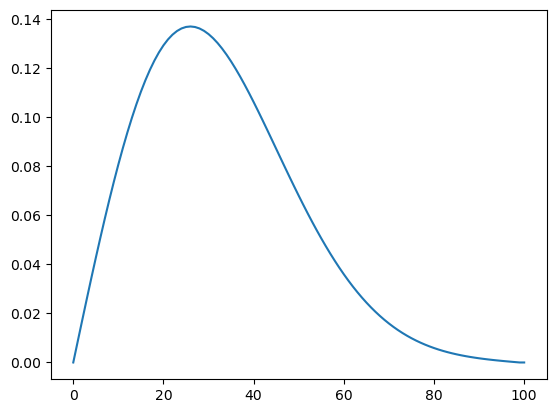

In [93]:
plt.plot(sediment[800,:])

#### The boundary conditions

Now that we have a time marching system that works, we also need to think about our boundary conditions. Right now, we have left them free to change  with each time step. This would work if we had a pile of sand or sediment on the left, and that no input is being taken in, and at the same time, in the lower end (on the right of the computation domain), the sediments are free to flow out.

Let's put some boundaries to the system to think about it as a different system.

Let's imagine first 

In [94]:
num_points = 101
num_steps = 1001
delta_x = 1.0
delta_t = 0.01
alpha = 38

sediment = np.zeros((num_steps, num_points)) 

sediment[0, :] = 0.0 # Please note that the .0 will be essential when you program in C for instance, to make sure that the computer
                     # records values with a decimal if you need it  --> if you do decimal operators on an integer it will not do what
                     # you want it to do.
    
sediment[0, 0:20] = 1.0 

for t in range(1, 1000):
    for i in range(1, 99):
        sediment[t, i] = sediment[t-1 , i] + alpha * (delta_t / (delta_x * delta_x)) * (sediment[t-1,i+1] - 2 * sediment[t-1,i] + sediment[t-1, i-1])
        sediment[t, 0] = 1;
        sediment[t, 99] = 0;

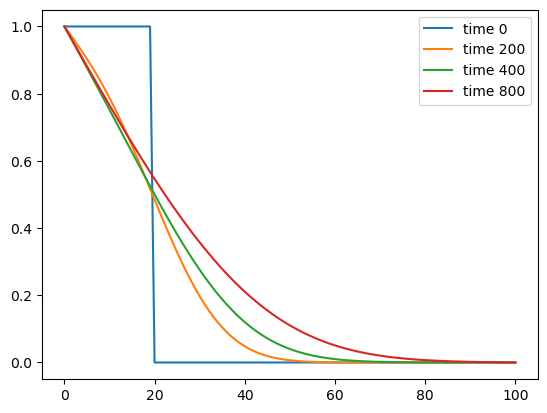

In [100]:
plt. plot (sediment[0,:], label = "time 0")
plt. plot (sediment[200,:], label = "time 200")
plt. plot (sediment[400,:], label = "time 400")
plt. plot (sediment[800,:], label = "time 800")
plt.legend()
plt.show()

In [104]:
num_points = 101
num_steps = 1001
delta_x = 1.0
delta_t = 0.01
alpha = 38

sediment = np.zeros((num_steps, num_points)) 

sediment[0, :] = 0.0 #
    
sediment[0, 0:20] = 1.0 

for t in range(1, 1000):
    for i in range(1, 99):
        sediment[t, i] = sediment[t-1 , i] + alpha * (delta_t / (delta_x * delta_x)) * (sediment[t-1,i+1] - 2 * sediment[t-1,i] + sediment[t-1, i-1])
        sediment[t, 0] = 1;
        sediment[t, 50:99] = sediment[t,50]; # here it would be best to have it at the end 99, but the flow here does not extend so far, so let's use it this way.

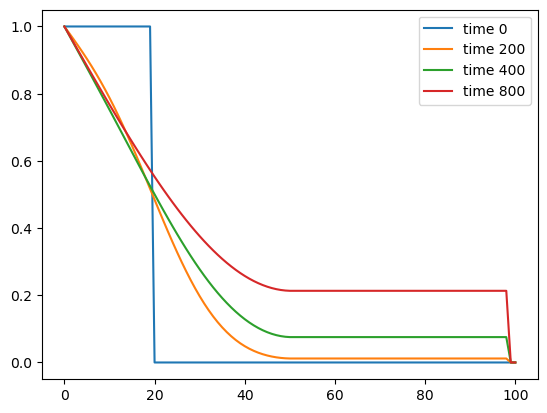

In [106]:
plt. plot (sediment[0,:], label = "time 0")
plt. plot (sediment[200,:], label = "time 200")
plt. plot (sediment[400,:], label = "time 400")
plt. plot (sediment[800,:], label = "time 800")
plt.legend()
plt.show()

#### Start boundary in x moving towards 0

In such a case, we can imagine that we have a sediment pile, or whatever which is being eroded, so that the base value goes down.　At the same time, the lower boundary in x is seeing a rise (here artificially high  for the purpose of this work, but we could also program let say a fault movement going up for instance). 

In [111]:
num_points = 101
num_steps = 1001
delta_x = 1.0
delta_t = 0.01
alpha = 38

sediment = np.zeros((num_steps, num_points)) 

sediment[0, :] = 0.0 #
    
sediment[0, 0:20] = 1.0 

for t in range(1, 1000):
    for i in range(1, 99):
        sediment[t, i] = sediment[t-1 , i] + alpha * (delta_t / (delta_x * delta_x)) * (sediment[t-1,i+1] - 2 * sediment[t-1,i] + sediment[t-1, i-1])
        #sediment[t, 0] = 1;
        sediment[t, 50:99] = sediment[t,50]; # here it would be best to have it at the end 99, but the flow here does not extend so far, so let's use it this way.

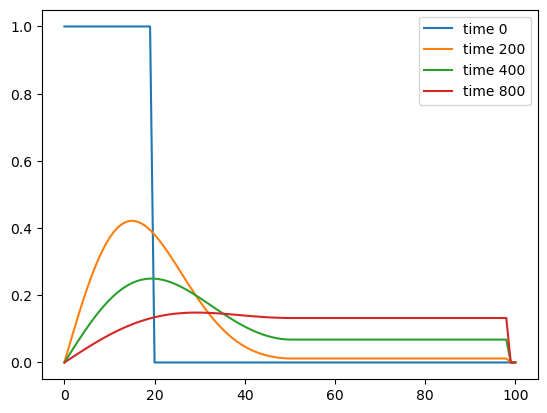

In [112]:
plt. plot (sediment[0,:], label = "time 0")
plt. plot (sediment[200,:], label = "time 200")
plt. plot (sediment[400,:], label = "time 400")
plt. plot (sediment[800,:], label = "time 800")
plt.legend()
plt.show()

### 2D parabolic equation

You can then extend what we have seen above to a 2 dimensional problem, adding the y dimension to the problem.

$$
\frac{\partial u}{\partial t} = \alpha [\frac {\partial ^2 u}{\partial x ^2} + \frac{\partial ^2 u}{\partial y^2}]
$$

... and to continue with the same explicit FTCS scheme, you can then write the equation to be solved as:

$$
\frac {u ^{n+1} _i,j - u ^n _{i,j}}{\Delta t} = \alpha [\frac{u ^n _{i+1, j} - 2u ^n _{i,j} + u ^n _{i-1,j}}{(\Delta x)^2} + \frac{u^n _{i,j+1} - 2 u^n _{i,j} + u^n _{i,j-1}}{(\Delta y)^2}]
$$

, and this formulation is stable providing that:

$$
[\frac{\alpha \Delta t}{(\Delta x)^2} + \frac{\alpha \Delta t}{(\Delta y)^2}] \leq 0.5
$$